# Assignment 2

Due Date:  11:59pm on Friday, October 2nd (for now)

## Question 1 - Fitting Part Deux

In the Jupyter Notebook called Fitting_Examples.ipynb, the last few examples considered cases where the uncertainty in the data became
larger at small x-values.  We considered three scenarios for collecting
the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it
to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values.  For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value.  Create a plot of the
uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [ ]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

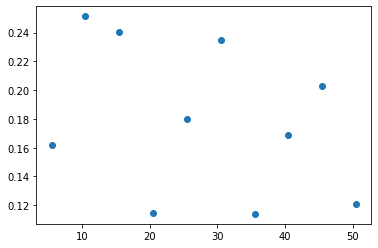

In [ ]:
# create some fake data
# 10 x ranges with constant low

npts = 11
xlow = 0.5
errbar = []
xmax = []
for x in range(1, 11):
  xhigh = (5 * x) + xlow
  xmax.append(xhigh)

  xi = np.linspace(xlow,xhigh,npts)

  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom

  sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
  init_vals = [0.0 for x in range(2)]
  popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
  perr = np.sqrt(np.diag(pcov))
  errbar.append(perr[0])

plt.scatter(xmax, errbar)

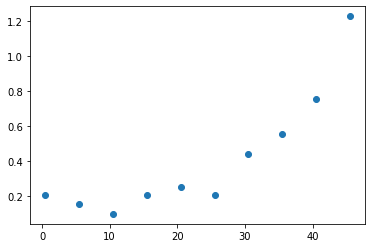

In [ ]:
# create some fake data
# 10 x ranges with constant high

npts = 11
xhigh = 50.5
errbar = []
xmin = []
for x in range(0, 10):
  xlow = (5 * x) + 0.5
  xmin.append(xlow)

  xi = np.linspace(xlow,xhigh,npts)

  yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
  yi = xi + yrandom

  sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
  init_vals = [0.0 for x in range(2)]
  popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
  perr = np.sqrt(np.diag(pcov))
  errbar.append(perr[0])

plt.scatter(xmin, errbar)

Based on these two experiments and multiple runnings of both, it becomes clear that there is a more sustinct pattern in the data when the high-end of the range is constant. In that dataset, there appears to be some exponential fit to the data. Conversely, after several runs of the dataset with a constant minimum, there appeared to be no pattern in the data. Therefore, when designing a similar experiment, it would be better to have a constant maximum in the range than a constant minimum. This way, the researcher can relatively control the error in the y-intercept.

## Question 2 - Why is it cold?

Modify the Jupyter Notebook called GlobalTemperatures.ipynb to consider the temperature variations over the year for five locations - two in the northern hemisphere, one near the equator, and two in the southern hemisphere.  Do not use any of the same locations already considered.

What are the scale factors and offsets required to give a reasonable fit in each case?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

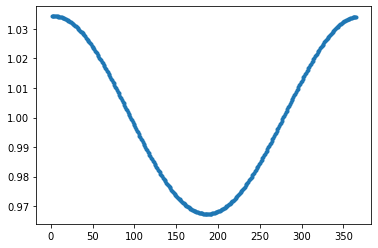

In [ ]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

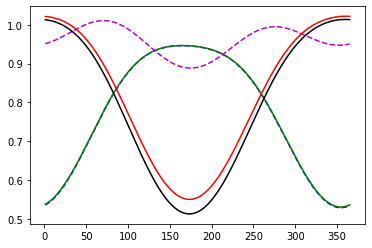

In [ ]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleCary = 35.7915*np.pi/180.0 - angle
angleTokyo = 35.6804*np.pi/180.0 - angle
angleEntebbe = 0.0512*np.pi/180.0 - angle
anglePerth = -31.9505*np.pi/180.0 - angle
angleBuenosAires = -34.6037*np.pi/180.0 - angle

plt.plot(dayOfYear,(np.cos(angleCary)*relPower),'b--')
plt.plot(dayOfYear,(np.cos(angleTokyo)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleEntebbe)*relPower), 'm--')
plt.plot(dayOfYear,(np.cos(anglePerth)*relPower),'r')
plt.plot(dayOfYear,(np.cos(angleBuenosAires)*relPower), 'k')

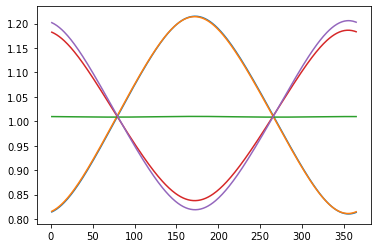

In [ ]:
from Sun import Sun

coords = {'longitude': 78.7811, 'latitude': 35.7915}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionC = dayLength/12.0

coords = {'longitude': -139.7690, 'latitude': 35.6804}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionT = dayLength/12.0

coords = {'longitude': -32.4637, 'latitude': 0.0512}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionE = dayLength/12.0

coords = {'longitude': -115.8605, 'latitude': -31.9505}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionP = dayLength/12.0

coords = {'longitude': 58.3816, 'latitude': -34.6037}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24

lengthCorrectionBA = dayLength/12.0

plt.plot(dayOfYear,lengthCorrectionC)
plt.plot(dayOfYear,lengthCorrectionT)
plt.plot(dayOfYear,lengthCorrectionE)
plt.plot(dayOfYear,lengthCorrectionP)
plt.plot(dayOfYear,lengthCorrectionBA)

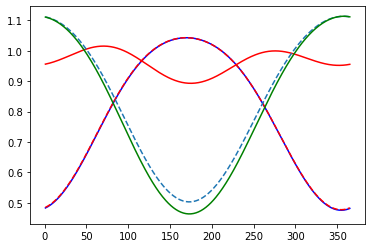

In [ ]:
tempCTheory = (np.cos(angleCary)*relPower*np.sqrt(lengthCorrectionC))
tempTTheory = (np.cos(angleTokyo)*relPower*np.sqrt(lengthCorrectionT))
tempETheory = (np.cos(angleEntebbe)*relPower*np.sqrt(lengthCorrectionE))
tempPTheory = (np.cos(anglePerth)*relPower*np.sqrt(lengthCorrectionP))
tempBATheory = (np.cos(angleBuenosAires)*relPower*np.sqrt(lengthCorrectionBA))

plt.plot(dayOfYear,tempCTheory,'b')
plt.plot(dayOfYear,tempTTheory,'r--')
plt.plot(dayOfYear,tempETheory,'r')
plt.plot(dayOfYear,tempPTheory,'--')
plt.plot(dayOfYear,tempBATheory,'g')

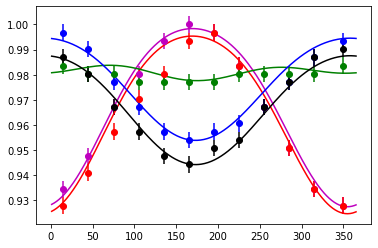

In [ ]:
tempC = np.array([10,12,16,22,26,30,32,31,27,22,17,12])+273.15
tempT = np.array([10,10,14,19,23,26,30,31,27,22,17,12])+273.15
tempE = np.array([27,27,26,26,25,25,25,25,26,26,26,26])+273.15
tempP = np.array([30,31,29,25,22,19,18,19,20,22,25,28])+273.15
tempBA = np.array([29,28,26,22,19,16,15,17,18,22,25,28])+273.15

error = np.array([1 for i in range(12)])

mean = tempC.max() # TODO Multiple?
tempC=tempC/mean
tempT=tempT/mean
tempE=tempE/mean
tempP = tempP/mean
tempBA = tempBA/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempC,yerr=error,fmt='mo')
plt.errorbar(month,tempT,yerr=error,fmt='ro')
plt.errorbar(month,tempE,yerr=error,fmt='go')
plt.errorbar(month,tempP,yerr=error,fmt='bo')
plt.errorbar(month,tempBA,yerr=error,fmt='ko')
plt.plot(dayOfYear,(tempCTheory-1)/8+.993,'m')
plt.plot(dayOfYear,(tempTTheory-1)/8+.99,'r')
plt.plot(dayOfYear,(tempETheory-1)/20+.983,'g')
plt.plot(dayOfYear,(tempPTheory-1)/15+.987,'b')
plt.plot(dayOfYear,(tempBATheory-1)/15+.98,'k')

## Question 3 - Kater's Pendulum

Begin with the example Jupyter Notebook called KaterPendulum.ipynb.  Carry out a full analysis of the data obtained in the subdirectory called ~/KaterPendulum/data/scan2.  The file in this directory called kater_scan2_c2.dat will tell you what the x-positions of the small mass were (they are slightly different than in the example we covered in class).

Think about how to "clean" the raw data before proceeding with the fits.

What value of g is the "best" value for this data?  What value of the "fudge factor" offset gives the best comparison of the theory to the data? Is this a reasonable offset?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#  position of small mass (in cm)
xpos = np.array([1.045, 2.044, 3.012, 4.012, 5.061, 6.011, 7.044])
dxpos = np.array([0.003 for i in range(len(xpos))])

./kater_2_run2.txt
Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855
./kater_2_run4.txt
Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951
./kater_2_run6.txt
Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879
./kater_2_run8.txt
Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694
./kater_2_run10.txt
Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776
./kater_2_run12.txt
Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695
./kater_2_run14.txt
Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901


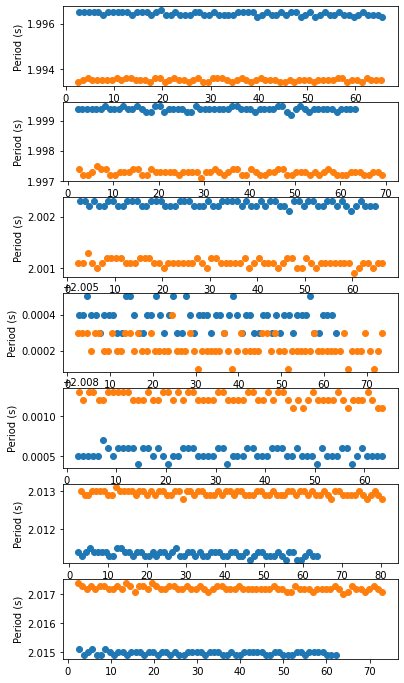

In [ ]:
prefix = './kater_2_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    print(fname1)
    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    tup.append(periodup.mean())
    dtup.append(semup)
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [ ]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[1.99350442e+00 2.80858978e-03 3.17652678e-05]
Covariance Matrix (from curve_fit)
[[ 3.44064474e-08 -1.80812150e-08  1.99607107e-09]
 [-1.80812150e-08  1.10498147e-08 -1.30715053e-09]
 [ 1.99607107e-09 -1.30715053e-09  1.61683442e-10]]
Coefficients (from curve_fit)
[1.98942806e+00 3.85342244e-03 1.23215841e-05]
Covariance Matrix (from curve_fit)
[[ 2.32017152e-08 -1.21925481e-08  1.34595622e-09]
 [-1.21925481e-08  7.45091723e-09 -8.81394001e-10]
 [ 1.34595622e-09 -8.81394001e-10  1.09018871e-10]]


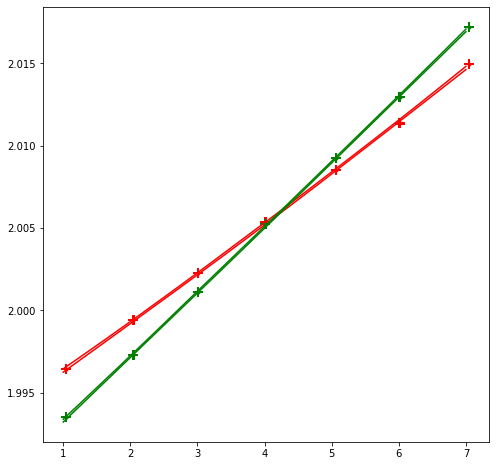

In [ ]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

plt.show()

In [ ]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00597 +/- 0.00048


In [ ]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7972 +/- 0.0047


In [ ]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar

g = 9.8144

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))

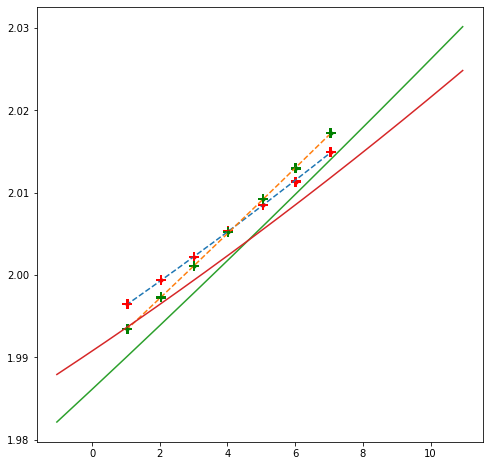

In [ ]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')

axs2.plot(xi,middled,'--')

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

Coefficients (from curve_fit)
[15.16182559]
Covariance Matrix (from curve_fit)
[[0.00023259]]
Coefficients (from curve_fit)
[17.16463656]
Covariance Matrix (from curve_fit)
[[0.00286971]]


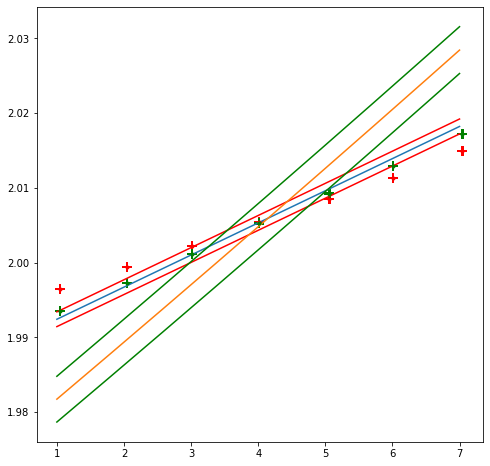

In [ ]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    fudge_factor=1.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    fudge_factor=1.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

plt.show()

In [ ]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

Period = 2.00590 +/- 0.00602
g = 9.7979 +/- 0.0588


With a fudge factor of 1 in each theory function, the theoretical value very closely matches the data. However, I believe this is an unreasonable offset. Additionally, the theoretical value has what I consider an unreasonably large error range (+/- 0.0588).